## 文档操作

### 导入依赖包

In [2]:
## 导入操作word文档和PDF文档的依赖库
! pip install pdfplumber

'pip' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


### 1. PDF文档操作

#### 读取文档

In [1]:
import pdfplumber
pdf = pdfplumber.open("测试文档/test1.pdf")
pages = pdf.pages

In [2]:
# 读取所有页面的文本内容
with pdfplumber.open("测试文档/test1.pdf") as pdf:
    for page in pdf.pages:
        print(page.extract_text())


Beijing
Beijing,China'ssprawlingcapital,isacityimbuedwithhistory,culture,andinnovation.Spanning
over 16,410 square kilometers, it is a hub of economic activity, political power, and cultural
wealth. Home to more than 21 million people, Beijing is a melting pot where tradition meets
modernity,creatingauniqueblendthatisquintessentiallyChinese.
Since the earliest days of China's recorded history, Beijing has been a pivotal center. The city's
rich past is evident in its numerousarchitectural marvels. The Forbidden City,a palatial heart of
the ancientChinese empire, is atestament to the grandeurof China's imperial past.Its intricate
design andmajesticbeauty attractmillionsofvisitorseach year,who marvel atitsopulence and
historicalsignificance.
Not far from the Forbidden City lies Tiananmen Square, the world's largest public square, a
symbolofnationalpride,andaplacesteepedinmodernhistory.TheNationalMuseumofChina
flanks the square's east side, offering visitors a comprehensive overview of Chi

In [3]:
# 获取单页文本（保留布局）
text = pages[0].extract_text(layout=True)
text

"                                                                                  \n                                                                                  \n                                                                                  \n                                                                                  \n                                                                                  \n                                                                                  \n                                                                                  \n            Beijing                                                               \n                                                                                  \n                                                                                  \n            Beijing,China'ssprawlingcapital,isacityimbuedwithhistory,culture,andinnovation.Spanning\n            over 16,410 square kilometers, it is a hub of 

### 2. 表格操作

In [4]:
table = pages[1].extract_table()
table

[['No.', 'Fruit', 'Price($)'],
 ['1', 'Apple', '1'],
 ['2', 'Banana', '0.5'],
 ['3', 'Pear', '0.7'],
 ['4', 'Orange', '1']]

In [5]:
import pandas as pd


df = pd.DataFrame(table[1:], columns=table[0])

print(df)

  No.   Fruit Price($)
0   1   Apple        1
1   2  Banana      0.5
2   3    Pear      0.7
3   4  Orange        1


### 3. 图片操作

In [6]:
pages[2].images

[{'x0': 90.0,
  'y0': 462.82,
  'x1': 260.52,
  'y1': 718.1800000000001,
  'width': 170.51999999999998,
  'height': 255.36000000000007,
  'stream': <PDFStream(24): raw=36782, {'BitsPerComponent': 8, 'ColorSpace': /'DeviceRGB', 'Filter': /'DCTDecode', 'Height': 500, 'Length': 36782, 'Subtype': /'Image', 'Type': /'XObject', 'Width': 334}>,
  'srcsize': (334, 500),
  'imagemask': None,
  'bits': 8,
  'colorspace': [/'DeviceRGB'],
  'mcid': None,
  'tag': None,
  'object_type': 'image',
  'page_number': 3,
  'top': 123.71999999999991,
  'bottom': 379.08,
  'doctop': 1807.52}]

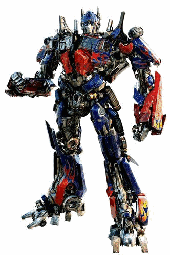

In [7]:
img = pages[2].images[0]
bbox = (img["x0"], img["top"], img["x1"], img["bottom"])
cropped_page = pages[2].crop(bbox)
cropped_page.to_image()